# Comparing Lump Sum vs. Dollar Cost Averaging (DCA) investing

* [View Notebook as HTML](http://elucidation.github.io/lumpsum_vs_dca/)
* [View Notebook on GitHub](https://github.com/Elucidation/lumpsum_vs_dca/blob/master/Lumpsum_vs_DCA.ipynb)

---

The topic of investing all at once versus spreading it over time has come up a few times with peers. I remembered reading in both bogleheads and an [Investopedia article](http://www.investopedia.com/articles/stocks/07/dca-fight.asp#axzz1UGjyAHAt) that lump sum beats DCA ~66% of the time. 

> Both lump-sum investing and DCA have their appropriate time and place. The research shows that lump-sum investing pays off about 66% of the time, which is a long way from all the time. It certainly makes sense to look carefully at the current market conditions. If you hit that bad 33% in lumpy style, you can lose a lot of money.

The idea espoused is that the market trends up in the long term, and therefore it's better to invest as early as possible instead of spreading your investments around to avoid the bottom; *time on the market* is statistically better.

Sounds logical, but when it's your money on the line, something sounding good isn't always good enough.
I decided to run an experiment validating the claim using IPython Notebook, Pandas, and matplotlib for visualization.

## The Experiment
This statement of *being better* 66% of the time wasn't completely intuitive to me, so I decided to do a little test. Let's imagine we have **\$10k to invest any time in the last 16 years**, from Feb 22, 2000 to Jan 9, 2016. And we want to choose the time and strategy that would have returned us the most money today. The two strategies I chose are:

1. Lump Sum, invest \$10k all at once on a date of choice
2. Dollar Cost Average, invest \$10k in 12 equal portions of \$833.33 every 30 days starting from a date of choice, for a total investment period of 360 days. There are alternatives but this is the one I arbitrarily chose.

I then **chose the [SPDR S&P 500 (SPY)](https://www.google.com/finance?q=NYSEARCA%3ASPY) as the stock we'll be investing in** because it follows the Standard & Poor 500 index, and is one of the most common ways to measure/invest in the market. 

> The Standard & Poor's 500 often abbreviated as the S&P 500 (or just "the S&P"). Chosen for market size, liquidity and industry grouping, among other factors. The S&P 500 is designed to be a leading indicator of U.S. equities and is meant to reflect the risk/return characteristics of the large cap universe.

Here is SPY for the last 16 years

![S&P 500](spy_16y.png "https://www.google.com/finance/getchart?q=SPY&p=16Y&i=86400")

This was partially inspired by looking at my portfolio today, 2015 and early 2016 has been pretty rough for the market, *relative to the bull run up to this point, and a drop in the bucket vs. the last crash so far*.

I have been lump sum investing up till this point. Perhaps this experiment will help illuminate the validity or flaws in the thought process behind that decision.

I list my [assumptions](#Assumptions) at the bottom of this page.

## Import financial data using Pandas
First let's import data, [Pandas](http://pandas.pydata.org/) is a great python library for data analysis and has a helper for pulling stock data from different websites like Yahoo Finance or Google Finance.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# Data date range, Google provides up to 4000 entries in one call
start = datetime.datetime(2000, 2, 10) 
end = datetime.datetime(2016, 1, 9)

spy = web.DataReader("SPY", "google", start, end)

print(spy.head()) # See first few rows

              Open    High     Low   Close    Volume
Date                                                
2000-02-10  141.62  142.56  140.88  141.56   6690600
2000-02-11  141.84  141.94  138.03  139.20   9848800
2000-02-14  139.78  139.78  138.31  139.50   8528800
2000-02-15  139.25  141.22  137.80  141.09  11083300
2000-02-16  140.38  140.94  138.80  139.19   8845200


We'll plot all the prices at Close using [matplotlib](matplotlib.org), a python 2D plotting library that is Matlab flavored. , 

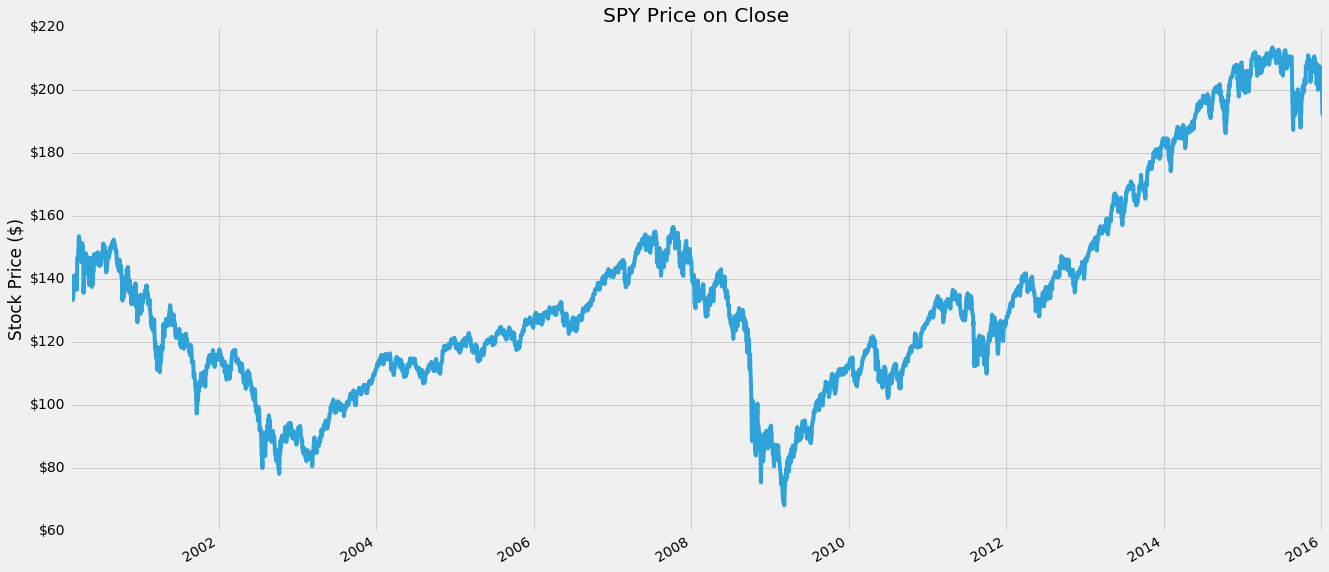

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import style
style.use('fivethirtyeight')

spy.Close.plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('SPY Price on Close')
plt.xlabel('')
plt.ylabel('Stock Price ($)');

Great, looks just like the SPY chart from before. We can easily see the the bubble and crash around 2007-2009, as well as the long bull market up since then. Also we can see in the last couple months the small dip in September/October, and barely see the drop in the last couple days in the beginning of 2016.

## Calculate Lump Sum
Lump Sum means to invest everything available all at once, in this case we have a hypothetical $10,000 to spend at any day in our history of the last 16 years. Then we want to know how much that investment would be worth today.

**Another way to look at this is we can make a chart where the X axis is the date we invest the lump sum, and the Y axis is the value of that investment today.**

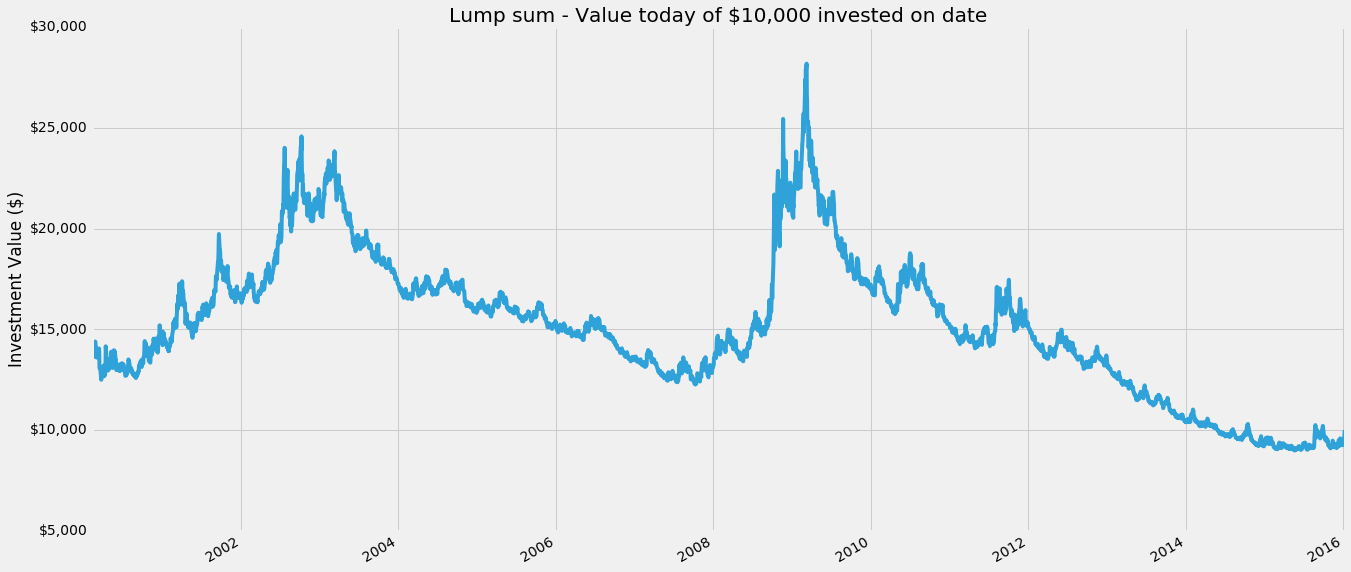

In [3]:
value_price = spy.Close[-1] # The final value of our stock
initial_investment = 10000 # Our initial investment of $10k

num_stocks_bought = initial_investment / spy.Close
lumpsum = num_stocks_bought * value_price
lumpsum.name = 'Lump Sum'

lumpsum.plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('Lump sum - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)');

Cool! Pandas makes it really easy to manipulate data with datetime indices. Looking at the chart we see that if we'd bought right at the bottom of the 2007-2009 crash our \$10k would be worth almost \$30k. If only we had a time machine...

In [4]:
print("Lump sum: Investing on the 1 - Best day, 2 - Worst day in past, 3 - Worst day in all")
print("1 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum.idxmax().strftime('%b %d, %Y'), lumpsum.max()))
print("2 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum[:-1000].idxmin().strftime('%b %d, %Y'), lumpsum[:-1000].min()))
print("3 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum.idxmin().strftime('%b %d, %Y'), lumpsum.min()))

Lump sum: Investing on the 1 - Best day, 2 - Worst day in past, 3 - Worst day in all
1 - Investing $10,000 on Mar 09, 2009 would be worth $28,177.95 today.
2 - Investing $10,000 on Oct 09, 2007 would be worth $12,264.83 today.
3 - Investing $10,000 on May 21, 2015 would be worth $8,989.23 today.


What's nice to note as well is that even if we'd invested at the peak of the bubble in 2007, on Oct 9th, we'd still have come out somewhat positive at \$12,264.83 today. The worst time to invest so far turns out to be more recent, on May 21st of 2015. This is because not only was the market down, but it's so recent we haven't had time for the investment to grow. *Something something the best time to plant a tree was yesterday.*

## Caluculating Lump Sum
Now lets do the same experiment, but instead we'll invest the \$10k we have using Dollar Cost Averaging (DCA). For this simple test, I'll assume instead of investing all at once, I'll invest in equal portions every 30 days (roughly a month), over a course of 360 days (roughly a year) total. 

So on day 1, I invest `$10,000 / 12 ~ $833.33`, on day 31, the same `$833.33`
and so on for 12 total investments. A special case is investing within the last year, when there isn't time to DCA all of it, as a compromise, I invest what portions I can and keep the rest as cash, since that is how reality works.

In [5]:
def doDCA(investment, start_date):
    # Get 12 investment dates in 30 day increments starting from start date
    investment_dates_all = pd.date_range(start_date,periods=12,freq='30D')
    # Remove those dates beyond our known data range
    investment_dates = investment_dates_all[investment_dates_all < end]

    # Get closest business dates with available data
    closest_investment_dates = spy.index.searchsorted(investment_dates)

    # How much to invest on each date
    portion = investment/12

    # Get the total of all stocks purchased for each of those dates (on the Close)
    stocks_invested = sum(portion / spy.Close[closest_investment_dates])

    # Add uninvested amount back
    uninvested_dollars = portion * sum(investment_dates_all >= end)

    # value of stocks today
    total_value = value_price*stocks_invested + uninvested_dollars
    return total_value

# Generate DCA series for every possible date
dca = pd.Series(spy.index.map(lambda x: doDCA(initial_investment, x)), index=spy.index, name='Dollar Cost Averaging (DCA)')

Surprisingly straightforward, good job Pandas. Let's plot it similar to how we did with lump sum. The x axis is the date at which we start dollar cost averaging (and then continue for the next 360 days in 30 day increments from that date). The y axis is the final value of our investment today.

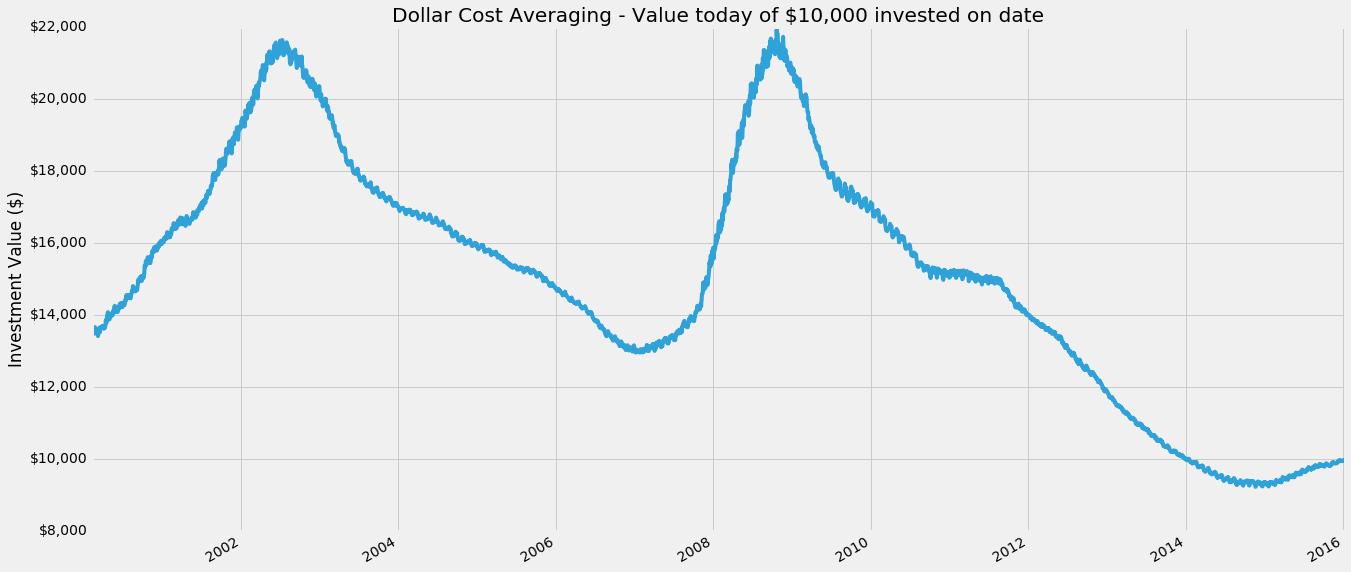

In [6]:
dca.plot(figsize=(20,10))
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis dollarsymbols
plt.title('Dollar Cost Averaging - Value today of $10,000 invested on date')
plt.xlabel('')
plt.ylabel('Investment Value ($)');

Interesting! DCA looks way peakier than lump sum, so it must be better right!? Wait, no, the Y axis is different, in fact it's highest high is around \$22k in comparison to the lump sums \$28k. Let's look at the ideal/worst investment dates for DCA, I include the lump sum from before as well.

In [7]:
print("Lump sum")
print("1 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum.idxmax().strftime('%b %d, %Y'), lumpsum.max()))
print("2 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum[:-1000].idxmin().strftime('%b %d, %Y'), lumpsum[:-1000].min()))
print("3 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(lumpsum.idxmin().strftime('%b %d, %Y'), lumpsum.min()))

print("Dollar Cost Averaging")
print("1 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(dca.idxmax().strftime('%b %d, %Y'), dca.max()))
print("2 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(dca[:-1000].idxmin().strftime('%b %d, %Y'), dca[:-1000].min()))
print("3 - Investing $10,000 on {} would be worth ${:,.2f} today.".format(dca.idxmin().strftime('%b %d, %Y'), dca.min()))

Lump sum
1 - Investing $10,000 on Mar 09, 2009 would be worth $28,177.95 today.
2 - Investing $10,000 on Oct 09, 2007 would be worth $12,264.83 today.
3 - Investing $10,000 on May 21, 2015 would be worth $8,989.23 today.
Dollar Cost Averaging
1 - Investing $10,000 on Oct 21, 2008 would be worth $21,923.53 today.
2 - Investing $10,000 on Jan 26, 2007 would be worth $12,955.61 today.
3 - Investing $10,000 on Nov 20, 2014 would be worth $9,223.61 today.


Looking at dollar cost averaging, similar to lump sum, the best day to start dollar cost averaging was Oct 21, 2008, when the market had crashed to the bottom. The Worst day to start was around the peak of the bubble on Jan 26, 2007, and the absolute worst would have been to start around a year and a bit ago on Nov 20, 2014.

What does this mean, it's difficult to compare just by looking at numbers, we need to compare the two strategies side by side.

## Comparison of Lump Sum vs Dollar Cost Averaging

So we've just individuallly tested two investing strategies exhaustively on every possible day in the last 16 years.

Let's plot three charts on top of each other. The raw SPY stock price over the years on the top. Then in the middle we plot both lump sum and DCA on top of each other. Finally we'll plot the difference between them as $diff = lump sum - DCA$

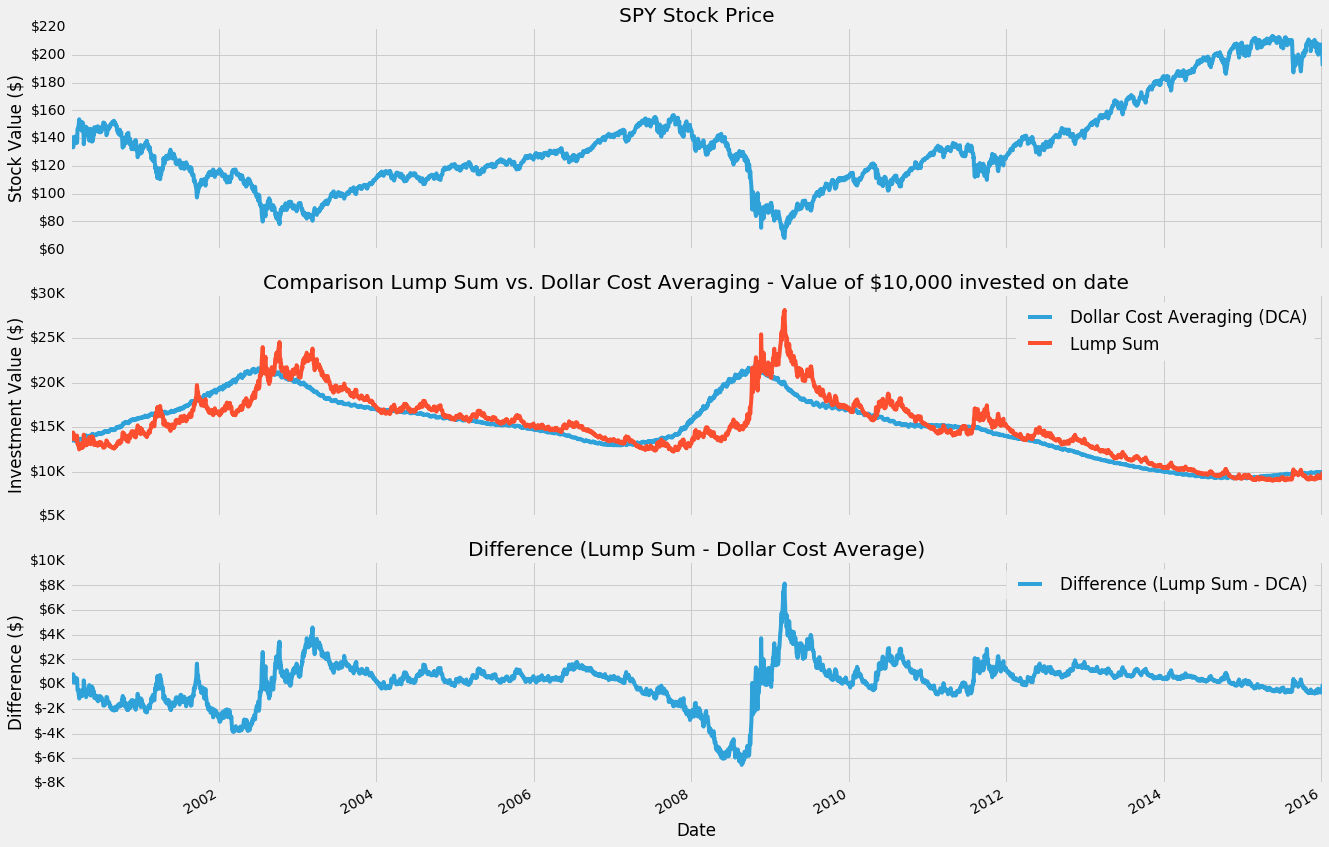

In [8]:
# Difference between lump sum and DCA
diff = (lumpsum - dca)
diff.name = 'Difference (Lump Sum - DCA)'

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(20,15))

# SPY Actual
spy.Close.plot(ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))) # Y axis in dollars
ax1.set_xlabel('')
ax1.set_title('SPY Stock Price')
ax1.set_ylabel('Stock Value ($)')

# Comparison
dca.plot(ax=ax2)
lumpsum.plot(ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x*1e-3))) # Y axis $1,000s
ax2.legend()
ax2.set_title('Comparison Lump Sum vs. Dollar Cost Averaging - Value of $10,000 invested on date')
ax2.set_ylabel('Investment Value ($)')

# Difference
diff.plot(ax=ax3)
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x*1e-3))) # Y axis $1,000s
ax3.set_ylabel('Difference ($)')
ax3.set_title('Difference (Lump Sum - Dollar Cost Average)')
ax3.legend();

Looking at the DCA curve we do see the two similar humps we saw with the lump sum, but is both smoother and lags behind it. This makes perfect sense, as **we're taking a type of moving average of the stock price over a year** (in 30D increments) when we buy, instead of a single date. 

As a result our investment with DCA is **less volatile** (smoother), and **lags behind** (averages in previous investments) the lump sum values.

The line for difference shows a positive dollar value for how much more investing in one lump sum would return versus dollar cost averaging in. Similarly a negative value shows how much more dollar cost averaging would return vs a lump sum. The chart shows a wide swing around 2003 and 2009 between the two strategies, but elsewhere it's mostly positive, **suggesting lump sum tends to return a bit more overall.** Let's look at the actual percentage where the values are positive (ie. where lump sum returns more).

In [9]:
print("Lump sum returns more than DCA %.1f%% of all the days" % (100*sum(diff>0)/len(diff)))
print("DCA returns more than Lump sum %.1f%% of all the days" % (100*sum(diff<0)/len(diff)))


Lump sum returns more than DCA 63.9% of all the days
DCA returns more than Lump sum 36.1% of all the days


Remarkable! So **63.9% of the time lump sum results in a higher final investment value** over our monthly dollar cost averaging strategy. Quite close to the claims of 66% by the investopedia article I'd read.

But maybe this isn't the whole story, perhaps the lump sum returned a *little* better than DCA most of the time, but in the really bad times DCA would do *much* better?

One way to look at this, would be to see the average amount improvement lump sum has when it is better, versus the average amount DCA improves, when it is better.

In [10]:
print("Mean difference: Average dollar improvement lump sum returns vs. dca: ${:,.2f}".format(sum(diff) / len(diff)))
print("Mean difference when lump sum > dca: ${:,.2f}".format(sum(diff[diff>0]) / sum(diff>0)))
print("Mean difference when dca > lump sum: ${:,.2f}".format(sum(-diff[diff<0]) / sum(diff<0)))

Mean difference: Average dollar improvement lump sum returns vs. dca: $93.88
Mean difference when lump sum > dca: $1,024.22
Mean difference when dca > lump sum: $1,551.12


So for every possible day in the last 16 years, a lump sum investment of \$10k would have returned *on average* \$93.88 more than dollar cost averaging, or 0.9388%, a pretty small improvement. When lump sum is better, it returned about \$1k or 10%. However, when dollar cost averaging was better than lump sum, it returned \$1.5k more on average, or about 15%. 

That *is* higher! So maybe that mean's DCA is worth it? Well, unfortunately since DCA was better only about 36.1% of the time, even though it was 5% better*er* than lump sum during those times it still doesn't make up for the fact it was worse overall in the 16 year period. This is why our final average difference was showing a positive \$93.88 in favor of lump sum all together.

## The End?
**This small experiment explains and validates the claim that Lump sum statistically beats DCA about ~66% of the time.** 

We created a simple trial comparing lump sum to the strategy of investing in the same amount monthly over a year, and found that **lump sum still won ~63% of the time.**

---

Perhaps at this point we could say, *but wait! What we if looked at periods right after 3 months of bull markets, and then...* and I would stop right there. This sort of thinking is a pretty common dangerous path in a similar type of situation in data analysis and machine learning, where it's very easy to build a *perfect* model that is *perfectly overfit* for the limited training dataset it was trained on. As soon as that model is taken away from that training set and applied elsewhere, ie. the real world, it falls apart.

What does that mean? [Wikipedia explains the concept well](https://en.wikipedia.org/wiki/Regularization_(mathematics)), but say for example you were trying to fit a polynomial to a set of points like this, with points shown in red.

![overfit](https://upload.wikimedia.org/wikipedia/commons/f/fd/75hwQ.jpg)

The reality is something like the green curve, but because we try to perfectly fit the data points, our model returns us something like the blue line. Sure, at those points, it's exactly right, but elsewhere, it is completely wrong. Similarly in the case of investing, as we try to more perfectly predict a DCA strategy for the stock market (*for a specific stock even!*), the final model is much more likely to fail spectacularly at some point in the future == *lose all of your money*.

This experiment does give us some useful insights though. **Dollar Cost Averaging is a form of smoothing that reduces the volatility associated with investing date**. Investing at the 'wrong' time can cause a lot of anxiety and wishful thinking, *if only I had waited to buy in* or *if only I sold at the peak*. Using DCA we can alleviate the pressure of worrying that we're investing at a peak right before a looming cliff, at the possibly acceptable cost of reducing the statistical average return of about ~1% (in this very specific example, not generalizable). 

This experiment has temporarily satiated my curiosity on the matter of lump sum vs DCA, and 2016 will be another lump sum investing year for me. If we were all machines, we'd choose lump sum. Quantitative trading is 110% this type of unintuitive logic. I'm looking forward to revisiting this topic in the future.

## Assumptions

* We have exactly \$10k to invest at any point in time
* Assume we buy at the price of closing on any day, which is arbitrary but at least as reasonable as choosing the low or high for the day
* We ignore the value of a dollar changing over the years since thats a whole other topic
* Our final investment value is based on the closing price on the last day (Jan 8, 2016 close)
* No commissions yet, which would skew in lump sums favor anyway (1 vs 12 commission fees)

--- 

[GitHub Source Code](http://www.github.com/Elucidation/lumpsum_vs_dca/)